#06 토픽 모델링(Topic Modeling)-20뉴스그룹

머신러닝 기반의 토픽 모델은 숨겨진 주제를 효과적으로 표현할 수 있는 중심 단어를 함축적으로 추출함.

**LDA 토픽 모델링**

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

#모토사이클,야구,그래픽스,윈도우즈, 중동, 기독교, 전자공학, 의학 8개 주제를 추출
cats =['rec.motorcycles','rec.sport.baseball','comp.graphics','comp.windows.x','talk.politics.mideast','soc.religion.christian','sci.electronics','sci.med']

#위에서 cats 변수로 기재된 카테고리만 추출.fetch_20newsgroups()의 categories에 cats 입력
news_df = fetch_20newsgroups(subset='all',remove=('headers','footers','quotes'),categories=cats,random_state=0)

#LDA는 Count기반의 벡터화만 적용합니다.
count_vect = CountVectorizer(max_df=0.95,max_features=1000,min_df=2,stop_words='english',ngram_range=(1,2))

feat_vect = count_vect.fit_transform(news_df.data)
print('CountVectorizer Shape:',feat_vect.shape)

CountVectorizer Shape: (7862, 1000)


토큰의 빈도가 max_df로 지정한 값을 초과 하거나 min_df로 지정한 값보다 작은 경우에는 무시한다.  
max_features : 추출할 단어 피처의 개수

CountVectorizer 객체 변수인 feat_vect 모두 7862개의 문서가 1000개의 피처로 구성된 행렬 데이터

In [ ]:
#n_components : 토픽 개수
lda = LatentDirichletAllocation(n_components=8,random_state=0)
lda.fit(feat_vect)

LatentDirichletAllocation(n_components=8, random_state=0)

In [ ]:
print(lda.components_.shape)
#components_ : 개별 토픽별로 각 word 피처가 얼마나 많이 그 토픽에 할당됐는지에 대한 수치를 가진다.
#높은 값일수록 해당 word 피처는 그 토픽의 중심 word
lda.components_

(8, 1000)


array([[3.60992018e+01, 1.35626798e+02, 2.15751867e+01, ...,
        3.02911688e+01, 8.66830093e+01, 6.79285199e+01],
       [1.25199920e-01, 1.44401815e+01, 1.25045596e-01, ...,
        1.81506995e+02, 1.25097844e-01, 9.39593286e+01],
       [3.34762663e+02, 1.25176265e-01, 1.46743299e+02, ...,
        1.25105772e-01, 3.63689741e+01, 1.25025218e-01],
       ...,
       [3.60204965e+01, 2.08640688e+01, 4.29606813e+00, ...,
        1.45056650e+01, 8.33854413e+00, 1.55690009e+01],
       [1.25128711e-01, 1.25247756e-01, 1.25005143e-01, ...,
        9.17278769e+01, 1.25177668e-01, 3.74575887e+01],
       [5.49258690e+01, 4.47009532e+00, 9.88524814e+00, ...,
        4.87048440e+01, 1.25034678e-01, 1.25074632e-01]])

components_ : array[8,4000]  
8개의 토픽별로 1000개의 word 피처가 해당 토픽별로 연관도 값을 가지고 있다.  
components_array의 0번째row, 10번째 col에 있는 값   
= Topic #0에 대해서 피처 벡터화된 행렬에서 10번째 칼럼에 해당하는 피처가 Topic #0에 연관되는 수치 값

display_topics() : 각 토픽별로 연관도가 높은 순으로 word를 나열해보자.

In [ ]:
def display_topics(model,feature_names, no_top_words):
    for topic_index,topic in enumerate(model.components_):
        print('Topic #',topic_index)

        #components_array에서 가장 값이 큰 순으로 정렬했을 때, 그 값의 array 인덱스를 반환.
        topic_word_indexes = topic.argsort()[::-1]
        top_indexes = topic_word_indexes[:no_top_words]

        #top_indexes 대상인 인덱스별로 feature_names에 해당하는 word featrue 추출 후 join으로 concat
        feature_concat = ' '.join([feature_names[i] for i in top_indexes])
        print(feature_concat)


In [ ]:
#CountVectorizer객체 내의 전체 word의 명칭을 get_features_names()를 통해 추출
feature_names = count_vect.get_feature_names()
len(feature_names)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


1000

In [ ]:
#토픽별 가장 연관도가 높은 word를 15개만 추출
display_topics(lda,feature_names,15)

Topic # 0
year 10 game medical health team 12 20 disease cancer 1993 games years patients good
Topic # 1
don just like know people said think time ve didn right going say ll way
Topic # 2
image file jpeg program gif images output format files color entry 00 use bit 03
Topic # 3
like know don think use does just good time book read information people used post
Topic # 4
armenian israel armenians jews turkish people israeli jewish government war dos dos turkey arab armenia 000
Topic # 5
edu com available graphics ftp data pub motif mail widget software mit information version sun
Topic # 6
god people jesus church believe christ does christian say think christians bible faith sin life
Topic # 7
use dos thanks windows using window does display help like problem server need know run


#07 문서 군집화 소개와 실습(Opinion Review 데이터 세트)

**문서 군집화**   
: 비슷한 텍스트 구성의 문서를 군집화(Clustering) 하는 것  
학습 데이터 세트가 필요 없는 비지도학습 기반으로 동작

##Opinion Review 데이터 세트를 이용한 문서 군집화 수행하기

전체 51개의 파일이 토요타와 같은 자동차 브랜드에 대한 평가와 아이팟 나노(ipod nano)의 음질과 같은 다양한 전자 제품과 호텔 서비스 등에 대한 리뷰 내용

In [ ]:
#여러 개의 파일을 DataFrame으로 로딩해보자.
import pandas as pd
import glob, os

path = '/content/drive/MyDrive/ESAA(22-1)/Week10/Opinosis Opinion Review Data set/OpinosisDataset1.0/topics'
#path로 지정한 디렉터리 밑에 있는 모든 .data 파일의 파일명을 리스트로 취합.
all_files = glob.glob(os.path.join(path,"*.data"))
filename_list=[]
opinion_text = []

#개별 파일의 파일명은 filename_list로 취합,
#개별 파일의 파일 내용은 DataFrame 로딩 후 sting으로 변환해 opinion_text_list로 취합
for file_ in all_files:
    #개별 파일을 읽어서 DataFrame으로 생성
    df = pd.read_table(file_,index_col=None,header=0,encoding='latin1')

    #절대 경로로 주어진 확장명을 가공.
    #맨 마지막 .data 확장자도 제거
    filename_ = file_.split('/')[-1]
    filename = filename_.split('.')[0]

    #파일명 list와 파일 내용 list에 파일명과 파일 내용을 추가.
    filename_list.append(filename)
    opinion_text.append(df.to_string().replace("    ","")) #첫 공백 제거


In [ ]:
document_df = pd.DataFrame({'filename':filename_list,'opinion_text':opinion_text})
document_df.iloc[4,1]

"headphone jack i got a clear case for it and it  i got a clear case for it and it like prvents me from being able to put the jack all the way in so the sound can b messsed up or i can get it in there and its playing well them go to move or something and it slides out .\n0 Picture and sound quality are excellent for this typ of devic .\n1  Great sound, easy to load & use once I read the instructions .\n2 The music I loaded sounds clear and crisp .\n3As for the overall sound I would give it a 8 out of 10, and the volume offers itself loud enough to tune out everything else at your local gym .\n4sound and picture quality is great !\n5  I notice that the audio playback has improved alot over the previous generations I could hear hissing in the third generation and didn't really remember how if sounded on the fourth generation because I didn't have it along time .\n6  Sound quality on the built in speaker is not great but through headphones is awesome !\n7  Video camera quality and sound a

In [ ]:
document_df.head()

,filename,opinion_text
0,battery-life_ipod_nano_8gb,short battery life I moved up from an 8gb ...
1,directions_garmin_nuvi_255W_gps,You also get upscale features like spoken di...
2,battery-life_netbook_1005ha,"6GHz 533FSB cpu, glossy display, 3, Cell 23Wh ..."
3,display_garmin_nuvi_255W_gps,3 quot widescreen display was a bonus .\n0 ...
4,sound_ipod_nano_8gb,headphone jack i got a clear case for it and i...


In [ ]:
ex_file_path = '/content/drive/MyDrive/ESAA(22-1)/Week10/Opinosis Opinion Review Data set/OpinosisDataset1.0/topics/accuracy_garmin_nuvi_255W_gps.txt.data'
file_path_1 = ex_file_path.split('/')[-1]
file_path_1

'accuracy_garmin_nuvi_255W_gps.txt.data'

In [ ]:
file_path_2 = file_path_1.split('.')[0]
file_path_2

'accuracy_garmin_nuvi_255W_gps'

문서를 TF-IDF 형태로 피처 벡터화해보자.  
tokenizer는 이전 예제에서 Lemmatization을 구현한 LemNormalize() 함수를 이용할 것

In [ ]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

#단어 원형 추출 함수
lemmar = WordNetLemmatizer()
def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

#특수 문자 사전 생성: {33: None ...}
#ord() : 아스키 코드 생성
remove_punct_dict = dict((ord(punct),None) for punct in string.punctuation)

#LemNormalize() 함수
def LemNormalize(text):
    #텍스트 소문자 변경 후 특수 문자 제거
    text_new = text.lower().translate(remove_punct_dict)

    #단어 토큰화
    word_tokens = nltk.word_tokenize(text_new)

    #단어 원형 추출
    return LemTokens(word_tokens)



*   string.punctuation : 느낌표, 물음표, 더하기 등의 문자들
*   dict((ord(punct),None) for punct in string.punctuation) : 해당 문자 사전을 생성
*   text.lower().translate(remove_punct_dict) 로 문자 사전에 따라 None 으로 변환한다.
*   단어 토큰화 후에 토큰 별로 원형을 추출한다.





In [ ]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english',
                             ngram_range=(1,2),min_df=0.05,max_df=0.85)

#opinion_text 칼럼 값으로 피처 벡터화 수행
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  % sorted(inconsistent)


In [ ]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

#################
## 벡터화
#################
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english' , \
                             ngram_range=(1,2), min_df=0.05, max_df=0.85 )

#opinion_text 컬럼값으로 feature vectorization 수행
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  % sorted(inconsistent)


#08 문서 유사도

##문서 유사도 측정 방법 - 코사인 유사도

문서와 문서 간의 유사도 비교는 일반적으로 코사인 유사도(Cosine Similarity)를 사용한다.   
코사인 유사도는 벡터와 벡터 간의 유사도를 비교할 때 벡터의 크기보다는 벡터의 상호 방향성이 얼마나 유사한지에 기반한다.즉, 코사인 유사도는 두 벡터 사이의 사잇각을 구해서 얼마나 유사한지 수치로 적용한 것

##두 벡터 사잇각

In [ ]:
#cos_similarity() 함수 
#두 개의 넘파이 배열에 대한 코사인 유사도를 구한다.
import numpy as np

def cos_similarity(v1,v2):
    dot_product = np.dot(v1,v2)
    l2_norm = (np.sqrt(sum(np.square(v1)))*np.sqrt(sum(np.square(v2))))
    similarity = dot_product/l2_norm
    
    return similarity

doc_list로 정의된 3개의 간단한 문서의 유사도를 비교하기 위해 이 문서를 TF-IDF로 벡터화된 행렬로 변환한다.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

doc_list = ['if you take the blue pill, the story ends',
            'if you take the red pill, you stay in Wonderland',
            'if you take the red pill, I show you how deep the rabbit hole goes']

tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)

(3, 18)


반환된 행렬은 희소 행렬이므로 앞에서 작성한 cos_similarity() 함수의 인자인 array로 만들기 위해 밀집 행렬로 변환한 뒤 다시 각각을 배열로 변환한다.

In [ ]:
#TfidfVectorizer로 transform() 한 결과는 희소 행렬이므로 밀집 행렬로 변환
feature_vect_dense = feature_vect_simple.todense()
feature_vect_dense

matrix([[0.4155636 , 0.        , 0.4155636 , 0.        , 0.        ,
         0.        , 0.24543856, 0.        , 0.24543856, 0.        ,
         0.        , 0.        , 0.        , 0.4155636 , 0.24543856,
         0.49087711, 0.        , 0.24543856],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.23402865, 0.39624495, 0.23402865, 0.        ,
         0.3013545 , 0.        , 0.39624495, 0.        , 0.23402865,
         0.23402865, 0.39624495, 0.4680573 ],
        [0.        , 0.30985601, 0.        , 0.30985601, 0.30985601,
         0.30985601, 0.18300595, 0.        , 0.18300595, 0.30985601,
         0.23565348, 0.30985601, 0.        , 0.        , 0.18300595,
         0.3660119 , 0.        , 0.3660119 ]])

In [ ]:
#첫 번째 문장과 두 번째 문장의 피처 벡터 추출
vect1 = np.array(feature_vect_dense[0]).reshape(-1, )
vect2 = np.array(feature_vect_dense[1]).reshape(-1, )
vect1

array([0.4155636 , 0.        , 0.4155636 , 0.        , 0.        ,
       0.        , 0.24543856, 0.        , 0.24543856, 0.        ,
       0.        , 0.        , 0.        , 0.4155636 , 0.24543856,
       0.49087711, 0.        , 0.24543856])

In [ ]:
#첫 번째 문장과 두 번째 문장의 피처 벡터로 두 개 문장의 코사인 유사도 추출
similarity_simple = cos_similarity(vect1,vect2)
print('문장1,문장2 Cosine 유사도:{0:.3f}'.format(similarity_simple))

문장1,문장2 Cosine 유사도:0.402


In [ ]:
#첫 번째 문장과 세 번째 문장의 피처 벡터로 두 개 문장의 코사인 유사도 추출
vect1 = np.array(feature_vect_dense[0]).reshape(-1, )
vect3 = np.array(feature_vect_dense[2]).reshape(-1, )
similarity_simple = cos_similarity(vect1,vect3)
print('문장1,문장3 Cosine 유사도:{0:.3f}'.format(similarity_simple))

문장1,문장3 Cosine 유사도:0.404


In [ ]:
#두 번째 문장과 세 번째 문장의 피처 벡터로 두 개 문장의 코사인 유사도 추출
vect2 = np.array(feature_vect_dense[1]).reshape(-1, )
vect3 = np.array(feature_vect_dense[2]).reshape(-1, )
similarity_simple = cos_similarity(vect2,vect3)
print('문장2,문장3 Cosine 유사도:{0:.3f}'.format(similarity_simple))

문장2,문장3 Cosine 유사도:0.456


사이킷런은 코사인 유사도를 측정하기 위해 sklearn.metrics.pairwise.cosine_similarity API 제공한다.  
첫 번째 파라미터 : 비교 기준이 되는 문서의 피처 행렬  
두 번째 파라미터 : 비교되는 문서의 피처 행렬  
cosine_similarity()는 희소 행렬, 밀집 행렬 모두가 가능하며, 행렬 또는 배열 모두 가능하다.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0],feature_vect_simple)
print(similarity_simple_pair)

[[1.         0.40207758 0.40425045]]


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0],feature_vect_simple)
print(similarity_simple_pair)

[[1.         0.40207758 0.40425045]]


In [ ]:
similarity_simple_pair = cosine_similarity(feature_vect_simple,feature_vect_simple)
print(similarity_simple_pair)
print('shape:',similarity_simple_pair.shape)


[[1.         0.40207758 0.40425045]
 [0.40207758 1.         0.45647296]
 [0.40425045 0.45647296 1.        ]]
shape: (3, 3)


#09 한글 텍스트 처리 - 네이버 영화 평점 감성 분석

In [ ]:
import pandas as pd

train_df = pd.read_csv('/content/drive/MyDrive/ESAA(22-1)/Week10/네이버 영화 평점/ratings_train.txt',sep='\t')
train_df.head(3)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0


In [ ]:
train_df['label'].value_counts()

0    75173
1    74827
Name: label, dtype: int64

In [ ]:
train_df.isnull().sum()

id          0
document    5
label       0
dtype: int64

0과 1의 비율이 어느 한쪽으로 치우치지 않고 균등한 분포를 나타내고 있다.


*   train_df의 경우 리뷰 텍스트를 가지는 'document'칼럼에 Null이 일부 존재하므로 이 값은 공백으로 변환한다. 
*   문자가 아닌 숫자의 경우 단어적인 의미로 부족하므로 파이썬의 정규 표현식 모듈인 re를 이용해 이 역시 공백으로 변환한다.



In [ ]:
import re

train_df = train_df.fillna(' ')
#정규 표현식을 이용해 숫자를 공백으로 변경(정규 표현식으로 \d는 숫자를 의미함.)
train_df['document'] = train_df['document'].apply(lambda x :re.sub(r"\d+"," ",x))

In [ ]:
train_df.isnull().sum()

id          0
document    0
label       0
dtype: int64

In [ ]:
#테스트 데이터 세트를 로딩하고 동일하게 Null 및 숫자를 공백으로 변환
test_df = pd.read_csv('/content/drive/MyDrive/ESAA(22-1)/Week10/네이버 영화 평점/ratings_test.txt',sep='\t')
test_df = test_df.fillna(' ')
test_df['document'] = test_df['document'].apply(lambda x :re.sub(r"\d+"," ",x))

#id 칼럼 삭제 수행
train_df.drop('id',axis=1,inplace=True)
test_df.drop('id',axis=1,inplace=True)

In [ ]:
test_df.isnull().sum()

document    0
label       0
dtype: int64



1.   각 문장 한글 형태소 분석을 통해 형태소 단어로 토큰화(SNS 분석에 적합한 Twitter 클래스를 이용)
2.   TF-IDF 방식으로 단어 벡터화



In [ ]:
install.packages('k')

NameError: ignored

In [ ]:
!pip install konlpy

In [ ]:
from konlpy.tag import Twitter

twitter = Twitter()
def tw_tokenizer(text):
    #입력 인자로 들어온 텍스트를 형태소 단어로 토큰화해 리스트 형태로 변환
    tokens_ko = twitter.morphs(text)
    return tokens_ko

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

#Twitter 객체의 morphs() 객체를 이용한 tokenizer를 사용. ngram_range는 (1,2)
tfidf_vect = TfidfVectorizer(tokenizer=tw_tokenizer,ngram_range=(1,2),min_df=3,max_df=0.9)
tfidf_vect.fit(train_df['document'])
tfidf_matrix_train = tfidf_vect.transform(train_df['document'])

In [ ]:
#로지스틱 회귀를 이용해 감성 분석 분류 수행
lg_clf = LogisticRegression(random_state=0)

#파라미터 C 최적화를 위해 GridSearchCV를 이용
params = {'C': [1,3.5,4.5,5.5,10]}
grid_cv = GridSearchCV(lg_clf,param_grid=params,cv=3,scoring='accuracy',verbose=1)
grid_cv.fit(tfidf_matrix_train,train_df['label'])
print(grid_cv.best_params_,round(grid_cv.best_score_,4))

In [ ]:
from sklearn.metrics import accuracy_score

#학습 데이터를 적용한 TfidfVectorizer를 이용해 테스트 데이터를 TF-IDF 값으로 피처 변환함.
tfidf_matrix_test = tfidf_vect.transform(test_df['document'])

#classifier는 GridSearchCV에서 최적 파라미터로 학습된 classifier를 그대로 이용
best_estimator = grid_cv.best_estimator_
preds = best_estimator.predict(tfidf_matrix_test)

print('Logistic Regression 정확도:',accuracy_score(test_df['label'],preds))

#10 텍스트 분석 실습- 캐글 Mercari Price Suggestion Challenge



*   train_id : 데이터 id
*   name : 제품명
*   item_condition_id : 판매자가 제공하는 제품 상태
*   category_name : 카테고리 명
*   brand_name : 브랜드 이름
*   price : 제품 가격, 예측을 위한 타깃 속성
*   shipping : 배송비 무료 여뷰, 1이면 무료(판매자가 지불), 0이면 유료(구매자 지불)
*   item_description : 제품에 대한 설명









##데이터 전처리

In [ ]:
from sklearn.linear_model import Ridge,LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd

mercari_df = pd.read_csv('/content/drive/MyDrive/ESAA(22-1)/Week10/mercari_train.tsv/mercari_train.tsv',sep='\t')
print(mercari_df.shape)
mercari_df.head(3)

(1482535, 8)


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...


In [ ]:
#피처의 타입과 Null 여부 확인
print(mercari_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1482535 non-null  int64  
 1   name               1482535 non-null  object 
 2   item_condition_id  1482535 non-null  int64  
 3   category_name      1476208 non-null  object 
 4   brand_name         849853 non-null   object 
 5   price              1482535 non-null  float64
 6   shipping           1482535 non-null  int64  
 7   item_description   1482531 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB
None


**brand_name** 칼럼 : 전체 1482535건 중에 849853건만 Not Null이고 많은 데이터가 Null값을 지닌다.  
**category_name** 칼럼 : 약 6300건의 Null 데이터를 지닌다.  
**item_description** 칼럼 : 4건의 Null 데이터를 지닌다. 

<Figure size 432x288 with 0 Axes>

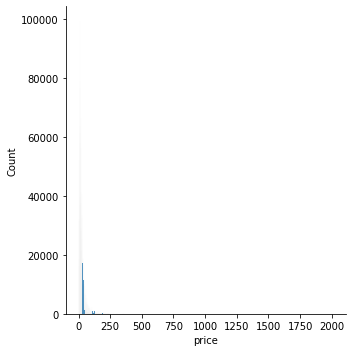

In [ ]:
#Price(Target값) 칼럼의 데이터 분포 확인
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

y_train_df = mercari_df['price']
plt.figure(figsize=(6,4))
sns.displot(y_train_df,kde=False)

**Price 값** 이 비교적 적은 가격을 가진 데이터 값에 왜곡돼 분포되어 있다.  
**Price 칼럼**을 **로그 변환**한 뒤 분포도를 다시 살펴보자.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


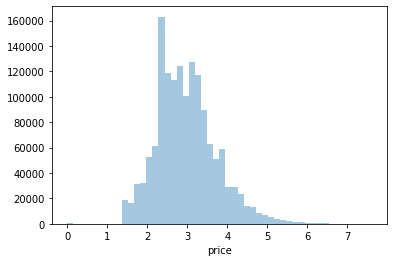

In [ ]:
import numpy as np

y_train_df = np.log1p(y_train_df)
sns.distplot(y_train_df,kde=False)

로그 변환한 결과, Price 값이 비교적 **정규 분포**에 가까워졌다.  
**데이터 세트의 Price 칼럼**을 원래 값에서 **로그 변환**된 값으로 변경해보자.

In [ ]:
mercari_df['price'] = np.log1p(mercari_df['price'])
mercari_df['price'].head(3)

0    2.397895
1    3.970292
2    2.397895
Name: price, dtype: float64

다른 피처들의 값도 살펴보자

In [ ]:
#shipping 값의 유형
print('Shipping 값 유형:\n',mercari_df['shipping'].value_counts())

#item_condition_id 값의 유형
print('item_condition_id 값 유형:\n',mercari_df['item_condition_id'].value_counts())

Shipping 값 유형:
 0    819435
1    663100
Name: shipping, dtype: int64
item_condition_id 값 유형:
 1    640549
3    432161
2    375479
4     31962
5      2384
Name: item_condition_id, dtype: int64


**Shipping 칼럼(배송비 유무)** : 비교적 값이 균일하게 분포  
**Item_condition_id 칼럼(판매자가 제공하는 제품 상태)** : 1,2,3 값이 주를 이루고 있다.

In [ ]:
#item_description 값의 유형
mercari_df['item_description'].value_counts()

No description yet                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              82489
New                                                                                               

In [ ]:
boolean_cond = (mercari_df['item_description'] == 'No description yet')  #교재와 다르게 조건식 괄호로 묶어줘야 함.
mercari_df[boolean_cond]['item_description'].count()

82489

**item_decscription 칼럼** : Null 값은 4건으로 적었지만  
별도의 설명이 없는 것을 뜻하는 **'No description yet'** 값을 가진 로우도 **82489건**이나 달함.  
Null과 마찬가지로 의미 있는 속성값으로 사용될 수 없으므로 **적절한 값으로 변경**해야 함.

In [ ]:
#category_name 값 유형
mercari_df['category_name'].value_counts()

Women/Athletic Apparel/Pants, Tights, Leggings    60177
Women/Tops & Blouses/T-Shirts                     46380
Beauty/Makeup/Face                                34335
Beauty/Makeup/Lips                                29910
Electronics/Video Games & Consoles/Games          26557
                                                  ...  
Handmade/Dolls and Miniatures/Primitive               1
Handmade/Pets/Tag                                     1
Handmade/Patterns/Accessories                         1
Home/Kids' Home Store/Nursery Furniture               1
Handmade/Pets/Blanket                                 1
Name: category_name, Length: 1287, dtype: int64

**Category_name 칼럼** : '/' 로 분리된 카테고리를 하나의 문자열로 나타내고 있다.  
Ex) 'Men/Tops/T-shirts' -> 대분류('Men'),중분류('Tops'),소분류('T-shirts')  
**'/' 기준으로 단어를 토큰화해 각각 별도의 피처로 저장**하고 이를 이용해 알고리즘을 학습시키자.

In [ ]:
#apply lambda에서 호출되는 대, 중, 소 분할 함수(split_cat 함수) 생성. 
#대, 중, 소 값을 리스트로 변환

def split_cat(category_name):
    try:  #Null이 아닌 경우에 '/' 기준으로 분리 , Null인 경우 에러 발생
        return category_name.split('/')
    except:  #위에 try문에서 error가 나는 경우(즉, 칼럼이 Null값을 갖는 경우) 대, 중, 소 분류 모두 'Other_Null' 값 부여
        return['Other_Null','Other_Null','Other_Null']

In [ ]:
#위의 split_cat()을 apply lambda 에서 호출해 대, 중, 소 칼럼을 mercari_df에 생성.
mercari_df['cat_dae'],mercari_df['cat_jung'],mercari_df['cat_so'] = zip(*mercari_df['category_name'].apply(lambda x: split_cat(x)))

zip과 * 를 apply lambda 식에 적용하면 cat_dae, cat_jung, cat_so 를 여러 개의 칼럼으로 간단하게 분리가능

In [ ]:
#대분류만 값의 유형과 건수를 살펴보고, 중분류, 소분류는 값의 유형이 많으므로 분류 개수만 추출
print('대분류 유형 : \n', mercari_df['cat_dae'].value_counts())
print('중분류 유형 : \n', mercari_df['cat_jung'].nunique())
print('소분류 유형 : \n', mercari_df['cat_so'].nunique())

대분류 유형 : 
 Women                     664385
Beauty                    207828
Kids                      171689
Electronics               122690
Men                        93680
Home                       67871
Vintage & Collectibles     46530
Other                      45351
Handmade                   30842
Sports & Outdoors          25342
Other_Null                  6327
Name: cat_dae, dtype: int64
중분류 유형 : 
 114
소분류 유형 : 
 871


**nunique()** :데이터에 고유값들의 수를 출력해주는 함수

대분류의 경우 Women, Beauty,Kids 등의 분류가 매우 많고, 중분류 유형은 114개, 소분류는 817개로 구성되어 있다.

In [ ]:
#칼럼 별 Null 값 처리 -> 모두 'Other_Null' 값으로 대체

mercari_df['brand_name'] = mercari_df['brand_name'].fillna(value='Other_Null')
mercari_df['category_name'] = mercari_df['category_name'].fillna(value='Other_Null')
mercari_df['item_description'] = mercari_df['item_description'].fillna(value='Other_Null')

In [ ]:
#각 칼럼별로 Null 값 건수 확인. 모두 0이 나와야 함.
mercari_df.isnull().sum()

train_id             0
name                 0
item_condition_id    0
category_name        0
brand_name           0
price                0
shipping             0
item_description     0
cat_dae              0
cat_jung             0
cat_so               0
dtype: int64

##피처 인코딩과 피처 벡터화

'Mercari Price Suggestion' 데이터 세트 **문자열 칼럼**이 많다.  
-> **원핫인코딩** or **피처 벡터화** 수행 필요

'Mercari Price Suggestion' 예측 모델은 price 값 예측이므로 **회귀 모델 기반**이다.  
선형 회귀의 경우, 원-핫 인코딩 적용이 선호됨.  
피처 벡터화의 경우, 짧은 텍스트는 Count 기반의 벡터화를, 긴 텍스트는 TD-IDF 기반의 벡터화를 적용해보자.

###1. brand_name 칼럼

In [ ]:
#brand_name 유형 건수
print('brand_name 의 유형 건수:',mercari_df['brand_name'].nunique())
#대표적인 브랜드명 5개 살펴보자.
print('brand name sample 5건 : \n',mercari_df['brand_name'].value_counts()[:5])

brand_name 의 유형 건수: 4810
brand name sample 5건 : 
 Other_Null           632682
PINK                  54088
Nike                  54043
Victoria's Secret     48036
LuLaRoe               31024
Name: brand_name, dtype: int64


대부분 **명료한 문자열** 형태 -> **원-핫 인코딩** 진행

###2. name 칼럼

In [ ]:
#name 종류 개수
print('name 의 종류 개수:',mercari_df['name'].nunique())  #교재와 다르게 df_train 말고 mercari_df 써야 함.
#상품명 7개만 출력해보자.
print('name sample 10건 : \n',mercari_df['name'][:10])

name 의 종류 개수: 1225273
name sample 10건 : 
 0       MLB Cincinnati Reds T Shirt Size XL
1          Razer BlackWidow Chroma Keyboard
2                            AVA-VIV Blouse
3                     Leather Horse Statues
4                      24K GOLD plated rose
5          Bundled items requested for Ruie
6        Acacia pacific tides santorini top
7      Girls cheer and tumbling bundle of 7
8                     Girls Nike Pro shorts
9    Porcelain clown doll checker pants VTG
Name: name, dtype: object


개별적으로 거의 고유한 상품명을 가지고 있어 **유형이 매우 많고, 적은 단어 위주의 텍스트** 형태 -> **Count 기반 피처 벡터화** 진행

###3. category_name에서 분리된 cat_dae,cat_jung,cat_so 칼럼

**원-핫 인코딩** 진행

###4. shipping 칼럼

배송비 무료 여부(0 또는 1) -> **원-핫 인코딩** 진행

###5. item_condition_id 칼럼  


상품 상태(1,2,3,4,5 의 다섯 가지 유형) -> **원-핫 인코딩** 진행

###6. item_description 칼럼

In [ ]:
pd.set_option('max_colwidth',200)

#item_description의 평균 문자열 크기
print('item_description 평균 문자열 크기:',mercari_df['item_description'].str.len().mean())

#앞에 2개 정도의 텍스트만 추출해보자
mercari_df['item_description'][:2]

item_description 평균 문자열 크기: 145.7113889385411


0                                                                                                                                                                              No description yet
1    This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work perfectly. The lights are customizable via the Razer Synapse app on your PC.
Name: item_description, dtype: object

상품에 대한 간단한 설명으로 **평균 문자열이 145자로 비교적 크다.** -> **TF-IDF 피처 벡터화** 진행

In [ ]:
#name 속성에 대한 피처 벡터화 변환
cnt_vec = CountVectorizer()
X_name = cnt_vec.fit_transform(mercari_df.name)

#item_description에 대한 피처 벡터화 변환
tfidf_descp = TfidfVectorizer(max_features = 50000, ngram_range=(1,3),stop_words='english')
X_descp = tfidf_descp.fit_transform(mercari_df['item_description'])

print('name vectorization shape:',X_name.shape)
print('item_description shape: ', X_descp.shape)

name vectorization shape: (1482535, 105757)
item_description shape:  (1482535, 50000)


CountVectorizer,TfidfVectorizer가 fit_transform() 통해 반환하는 데이터는 **희소 행렬 형태** ->   
X_name과 X_descp 와 결합되어야 하는 **'cat_dae','cat_jung','cat_so','bran_name','shipping','item_condition_id'** 칼럼들은   
**LabelBinarizer 클래스**를 이용해 **원-핫 인코딩** 진행

In [ ]:
from sklearn.preprocessing import LabelBinarizer

#brand_name,item_condition_id,shipping 각 피처들은 희소 행렬 원-핫 인코딩 변환
lb_brand_name = LabelBinarizer(sparse_output=True)  #sparse_output=True : 희소 행렬 형태로 인코딩 적용
X_brand = lb_brand_name.fit_transform(mercari_df['brand_name'])

lb_item_cond_id = LabelBinarizer(sparse_output=True)
X_item_cond_id =lb_item_cond_id.fit_transform(mercari_df['item_condition_id'])

lb_shipping = LabelBinarizer(sparse_output=True)
X_shipping = lb_shipping.fit_transform(mercari_df['shipping'])

#cat_dae, cat_jung, cat_so 각 피처들을 희소 행렬 원-핫 인코딩 변환
lb_cat_dae = LabelBinarizer(sparse_output=True)
X_cat_dae = lb_cat_dae.fit_transform(mercari_df['cat_dae'])

lb_cat_jung = LabelBinarizer(sparse_output=True)
X_cat_jung = lb_cat_jung .fit_transform(mercari_df['cat_jung'])

lb_cat_so = LabelBinarizer(sparse_output=True)
X_cat_so = lb_cat_so.fit_transform(mercari_df['cat_so'])

In [ ]:
print(type(X_brand),type(X_item_cond_id),type(X_shipping))
print('X_brand shape : {0},X_item_cond_id shape : {1}'.format(X_brand.shape,X_item_cond_id.shape))
print('X_shipping shape : {0}, X_cat_dae shape : {1}'.format(X_shipping.shape,X_cat_dae.shape))
print('X_cat_jung shape : {0}, X_cat_so shape : {1}'.format(X_cat_jung.shape,X_cat_so.shape))

<class 'scipy.sparse.csr.csr_matrix'> <class 'scipy.sparse.csr.csr_matrix'> <class 'scipy.sparse.csr.csr_matrix'>
X_brand shape : (1482535, 4810),X_item_cond_id shape : (1482535, 5)
X_shipping shape : (1482535, 1), X_cat_dae shape : (1482535, 11)
X_cat_jung shape : (1482535, 114), X_cat_so shape : (1482535, 871)


인코딩 변환된 데이터 세트 : CSR 형태로 변환된 csr_matrix 타입

In [ ]:
from scipy.sparse import hstack
import gc

sparse_matrix_list = (X_name,X_descp,X_brand,X_item_cond_id,X_shipping,X_cat_dae,X_cat_jung,X_cat_so)

#hstack 함수를 이용해 인코딩과 벡터화를 수행한 데이터 세트를 모두 결합.
X_features_sparse = hstack(sparse_matrix_list).tocsr()
print(type(X_features_sparse),X_features_sparse.shape)

#데이터 세트가 메모리를 많이 차지하므로 사용 목적이 끝났으면 바로 메모리에서 삭제
del X_features_sparse
gc.collect()

<class 'scipy.sparse.csr.csr_matrix'> (1482535, 161569)


0

hstack()으로 결합한 데이터 세트는 csr_matrix 타입이며, 총 161569개의 피처를 가진다.

##릿지 회귀 모델 구축 및 평가

In [ ]:
def rmsle(y,y_pred):
    #underflow,overflow를 막기 위해 log가 아닌 log1p로 rmsle 계산
    return np.sqrt(np.mean(np.power(np.log1p(y)-np.log1p(y_pred),2)))

def evaluate_org_price(y_test,preds):

    #원본 데이터는 log1p로 변환되었으므로 exmpm1로 원복 필요.
    preds_exmpm = np.expm1(preds)
    y_test_exmpm = np.expm1(y_test)

    #rmsle로 RMSLE 값 추출
    rmsle_result = rmsle(y_test_exmpm,preds_exmpm)
    return rmsle_result

In [ ]:
import gc
from scipy.sparse import hstack

def model_train_predict(model,matrix_list):   #matrix_list : 최종 데이터 세트로 결합할 희소 행렬 리스트
    #scipy.sparse 모듈의 hstack을 이용해 희소 행렬 결합
    X = hstack(matrix_list).tocsr()

    X_train,X_test,y_train,y_test = train_test_split(X,mercari_df['price'],test_size=0.2,random_state=156)

    #모델 학습 및 예측
    model.fit(X_train,y_train)
    preds = model.predict(X_test)

    del X,X_train,X_test,y_train  #rmsle 값을 계산하기 위한 값들만 제외하고 del 이용해 메모리에서 삭제
    gc.collect()

    return preds,y_test   


In [ ]:
linear_model =Ridge(solver='lsqr',fit_intercept=False)

sparse_matrix_list = (X_name,X_brand,X_item_cond_id, X_shipping, X_cat_dae, X_cat_jung, X_cat_so)
linear_preds, y_test = model_train_predict(model = linear_model, matrix_list = sparse_matrix_list)
print('Item Description 을 제외했을 때 rmlse 값:',evaluate_org_price(y_test,linear_preds))

Item Description 을 제외했을 때 rmlse 값: 0.5023727038010544


In [ ]:
sparse_matrix_list = (X_descp,X_name,X_brand,X_item_cond_id, X_shipping, X_cat_dae, X_cat_jung, X_cat_so)
linear_preds, y_test = model_train_predict(model = linear_model, matrix_list = sparse_matrix_list)
print('Item Description 을 제외했을 때 rmlse 값:',evaluate_org_price(y_test,linear_preds))

Item Description 을 제외했을 때 rmlse 값: 0.4712195143433641


Item Description을 포함했을 때 rmsle 값이 약 0.03 감소하였기에 Item description 변수의 영향이 중요함을 알 수 있다.

##LightGBM 회귀 모델 구축과 앙상블을 이용한 최종 예측 평가

In [ ]:
from lightgbm import LGBMRegressor

sparse_matrix_list = (X_descp,X_name,X_brand,X_item_cond_id,X_shipping,X_cat_dae,X_cat_dae,X_cat_jung,X_cat_so)

lgbm_model = LGBMRegressor(n_estimators=200,learning_rate=0.5,num_leaves=125,random_state=156)
lgbm_preds, y_test = model_train_predict(model = lgbm_model,matrix_list = sparse_matrix_list)
print('LightGBM rmsle 값:',evaluate_org_price(y_test,lgbm_preds))

LightGBM rmsle 값: 0.45691302141634976


In [ ]:
preds = lgbm_preds * 0.45 + linear_preds *0.55
print('LightGBM과 Ridge를 ensemble한 최종 rmsle 값:',evaluate_org_price(y_test,preds))

LightGBM과 Ridge를 ensemble한 최종 rmsle 값: 0.4504934271714057
